In [1]:
import plotly.express as px
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
from pyrolite.plot import pyroplot

In [2]:
dataset = pd.read_csv('Module1.csv') # import data
df = pd.DataFrame(data=dataset)     # convert to dataframe

In [3]:
# fitting will be done based on columns with numerical values, so the first 7 columns will be excluded
# data_for_fit = dataset.iloc[:,7:53] # uncomment this line to first try with all the elements
ind_list = [39,45] # list of element indices: Sc, Th
ind_list1 = [39,45, 49] # list of element indices: Sc, Th, V
data_for_fit = dataset.iloc[:,ind_list] # trying with Sc and Th
data_for_fit_V = dataset.iloc[:,ind_list1] # trying with Sc and Th + V

df_for_fit = pd.DataFrame(data=data_for_fit) # convert to dataframe
df_for_fit_V = pd.DataFrame(data=data_for_fit_V) # convert to dataframe

In [4]:
# remove the NaN and infinite values - error message "Input contains NaN, infinity or a value too large for dtype('float64')" 

df_for_fit_V.replace([np.inf, -np.inf], np.nan, inplace=True) # first replace all infinite values with Not-A-Number
data_fit_V = df_for_fit_V.dropna() # then drop all NAN values; the resulting dataset contains 3475 rows compared to the initial 3830 rows
df_for_fit.replace([np.inf, -np.inf], np.nan, inplace=True) # first replace all infinite values with Not-A-Number
data_fit = df_for_fit.dropna() # then drop all NAN values

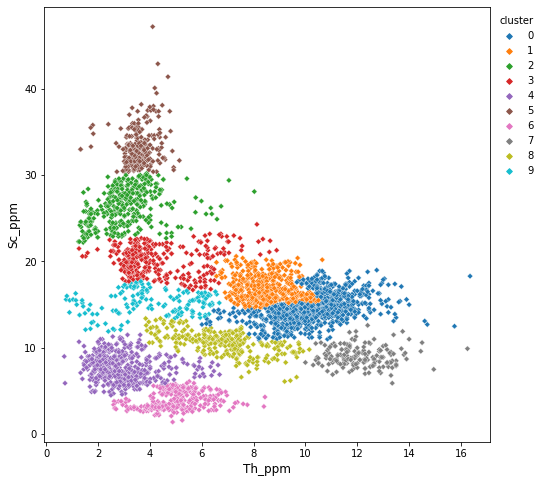

In [6]:
# try with Agglomerative clustering
from sklearn.cluster import AgglomerativeClustering
from sklearn.mixture import GaussianMixture
model2 = AgglomerativeClustering(n_clusters = 10)
model2.fit(data_fit)

# plot_2d_embedding(data_fit,model2.labels_)
# Now append the cluster number from model2 (Agglomerative clustering) to the dataset
data_fit2 = data_fit.copy()
data_fit2["cluster"] = model2.fit_predict(data_fit)

# plot the clusters in coordinates Sc and Th to see if the clustering reproduces the tutorial
plt.figure(figsize = (8,8))
fig3 = sns.scatterplot(x="Th_ppm", y="Sc_ppm", data=data_fit2, palette = "tab10", hue='cluster')
# th_centroids = model2.cluster_centers_
# sns.scatterplot(th_centroids[:,0], th_centroids[:,1], s=50, c='black', 
#            marker="x")
plt.savefig('Clustering agglom Th Sc.jpg', dpi = 300)

In [7]:
# create a dictionary of rock types based on clusters from Agglomerative clustering, data_fit2
# can't see the colors! Save as csv and look
data_fit2.to_csv('clusters.csv')
# Now append the cluster number to the dataset

data_fit1 = data_fit.copy()
data_fit1["cluster"] = model2.fit_predict(data_fit)
# clusters are quite ok defined except andesite/dacite1/2/3
# make a dictionary
rock_dictionary = {0:"dacite1" , 1:"dacite1/2" , 2:"mafic2" , 3:"andesite/dacite1" , 4:"diorite1" , 5:"mafic1" , 6:"diorite2" , 7:"dacite2" , 8:"dacite3" , 9:"andesite/dacite3"}

# Append the V/Sc column
df_for_fit_V["V/Sc"] = df_for_fit_V.V_ppm/df_for_fit_V.Sc_ppm

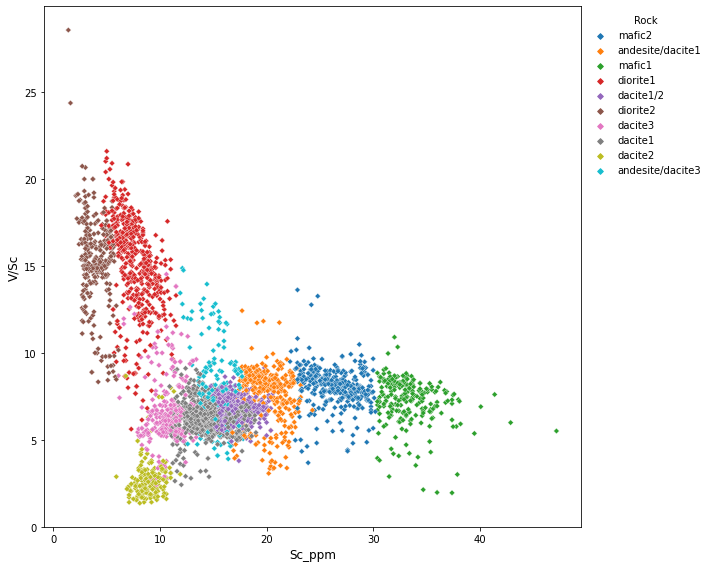

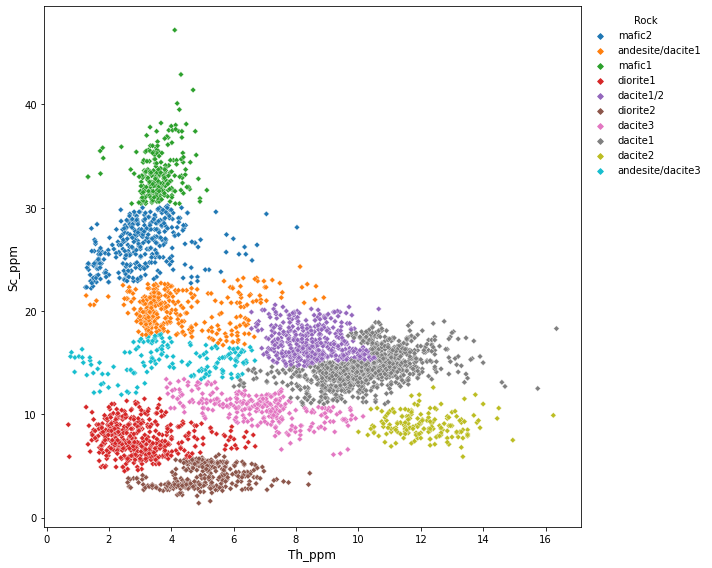

In [8]:
# Append rock names
df_for_fit_V["Rock"] = data_fit1["cluster"].map(rock_dictionary)
data_fit2["Rock"] = data_fit2["cluster"].map(rock_dictionary)


plt.figure(figsize = (10,8))
fig4 = sns.scatterplot(x="Sc_ppm", y="V/Sc", data=df_for_fit_V, palette = "tab10", hue='Rock')
plt.tight_layout()
plt.savefig('Hornblende fractionation.jpg', dpi = 300)

plt.figure(figsize = (10,8))
fig4 = sns.scatterplot(x="Th_ppm", y="Sc_ppm", data=data_fit2, palette = "tab10", hue='Rock')
plt.tight_layout()
plt.savefig('Clusters with names.jpg', dpi = 300)

In [13]:
# try plotting in 3d 
# append X Y Z from dataset to the predicted clusters

df["cluster"] =  data_fit2["cluster"]
df["Rock"] = data_fit2["Rock"]

fig = px.scatter_3d(df, x='East', y='North', z='Elevation',
              color='Rock')
fig.show()

In [14]:
# slice the dataset: from Sc vs V/Sc we see that the diorite 1 and diorite 2 are following 
# Hornblende fractionation, and all the others - magnetite fractionation, 
# and there is a bit of condusion for the andesite/dacite 3
# let's see if we can plot if so it is geologically plausible

hbl_fractionation = ['diorite1', 'diorite2']

df_diorite1 = df[df["Rock"]=='diorite1']
df_diorite2 = df[df["Rock"]=='diorite2']

# stack those two vertically

df_hornblende = pd.concat([df_diorite1, df_diorite2], axis=0)

# plot those in plotly
fig = px.scatter_3d(df_hornblende, x='East', y='North', z='Elevation',
              color='Rock')
fig.show()

In [15]:
# andesite/dacite3 is a problematic cluster and scatters across both hbl and mt fractionation trends
df_andesite_dacite3 = df[df["Rock"]=='andesite/dacite3']
fig = px.scatter_3d(df_andesite_dacite3, x='East', y='North', z='Elevation',
              color='Rock')
fig.show()

In [16]:
# problematic clusters are “dacite1" , "dacite1/2”

df_dacite1 = df[df["Rock"]=='dacite1']
df_dacite1_2 = df[df["Rock"]=='dacite1/2']

# stack those two vertically

df_dacites = pd.concat([df_dacite1, df_dacite1_2], axis=0)

fig = px.scatter_3d(df_dacites, x='East', y='North', z='Elevation',
              color='Rock')
fig.show()

In [18]:
# and then plot all the rest
df_mafic1 = df[df["Rock"]=='mafic1']
df_mafic2 = df[df["Rock"]=='mafic2']
df_andesite_dacite1 = df[df["Rock"]=='andesite/dacite1']
df_dacite2 = df[df["Rock"]=='dacite2']
df_dacite3 = df[df["Rock"]=='dacite3']

df_others = pd.concat([df_mafic1, df_mafic2, df_andesite_dacite1, df_dacite2, df_dacite3], axis=0)
fig = px.scatter_3d(df_others, x='East', y='North', z='Elevation',
              color='Rock')
fig.show()